# COMP4318 & 5318 - Machine Learning and Data Mining: Assignment 1

Due: Sunday Week 7 - Sep 15th, 2024 11:59PM

# 1. Summary

In this assignment, you are tasked with the challenge of developing machine learning (ML) classifiers capable of categorizing grayscale images into predefined classes. Your task involves employing various classification algorithms to identify which is most effective and efficient in processing image data. Additionally, you are required to document your methodologies and findings in a detailed report. The total score for this assignment is allocated as follows:

1. Code: max 65 points
2. Report: max 35 points

Detailed about assignment specifcations and scoring criteria can be found in the assignment page on Canvas (Assignments $\rightarrow$ Assignment 1 - Specification). The sections below provide comprehensive information on the assignment tasks and guidelines for submission.

# 2. Dataset description


The dataset for this assignment is derived from the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a collection of fashion articles represented as grayscale images. This dataset can be downloaded from Canvas. The dataset consists of a training set of 30,000 examples and a test set of 5,000 examples. They belong to 10 different categories. The validation set is not provided, but you can randomly pick a subset of the training set for validation. Your prediction over the test set must be submitted to Kaggle to receive the public accuracy over first 2,000 examples, you will use this accuracy to analyse the performance of your proposed method. It is NOT allowed to use any examples from the test set for training; or it will be considered as cheating. The rest 3,000 labels of the test set are reserved for marking purpose.

Data samples are categorized into the following ten classes:

- 0: T-shirt/Top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot


Below are visual examples of the dataset, showcasing samples from each category:

<img src="https://www.researchgate.net/publication/346405197/figure/fig3/AS:962581560848384@1606508736352/Examples-of-Fashion-MNIST-dataset.ppm" alt="DataSet" title="DataSet" width=500/>

The dataset can be downloaded from the Assignment 1 page on Canvas. Note that only a subset of the original Fashion-MNIST dataset is provided for this assignment. You must use the specific files supplied in the assignment materials for training and testing.

# 3. Data Preparation

The required `data` files are in the data folder, downloadable as a zip from the Assignment 1 - Specification page on Canvas. Extract the files into your working directory. The folder includes:

- `train.csv`: 30,000 labeled samples for training, evaluation, and model selection.
- `test1.csv`: 2,000 labeled samples for model efficiency testing (Canvas submission).
- `test2.csv`: 5,000 unlabeled samples for Kaggle evaluation.
- `sample.csv`: A sample prediction file format for Kaggle submission (`test_output.csv`).

Use Python's pandas library to load these CSV files into DataFrames, ensuring they are under the `./data/` directory.

## 3.1 Loading data

Use the following Python code to load the training data:  

In [1]:
import pandas as pd
import os
print(os.listdir("./data"))
pd.set_option('display.max_columns', 10)

['sample.csv', 'test1.csv', 'test2.csv', 'train.csv']


In [2]:
# train.csv including feature and label using for training model.
data_train_df = pd.read_csv('./data/train.csv')

In [3]:
# print out the first 5 rows of the training dataframe
data_train_df.head()

,id,v1,v2,v3,v4,...,v781,v782,v783,v784,label
0,1,0,0,0,0,...,0,0,0,0,6
1,2,0,0,0,0,...,0,0,0,0,7
2,3,0,0,0,0,...,0,0,0,0,4
3,4,0,0,0,0,...,0,0,0,0,7
4,5,0,0,0,0,...,0,0,0,0,3


Then data would be a dataframe with 30,000 samples including 784 features (from v1 to v784) and its label.

In [4]:
# Selecting input feature
data_train_feature = data_train_df.loc[:, "v1":"v784"].to_numpy()

# Selecting output lable
data_train_label = data_train_df.label.to_numpy()

Showing a sample data. The first example belongs to class 2: Pullover

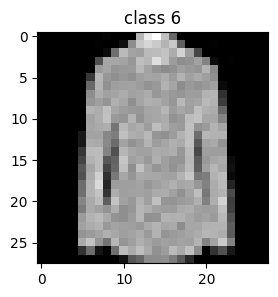

In [5]:
import matplotlib.pyplot as plt
data_train_feature = data_train_feature.reshape((data_train_feature.shape[0], 
                                                 28, 28))
plt.figure(figsize = (3,3))
plt.imshow(data_train_feature[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(data_train_label[0]))
plt.show()

# 4. Task Description

## 4.1 Code

You will now explore and build diffferent ML models for the given dataset. You are required to implement at least **FOUR** models, which should include THREE from the following methods:

1. Nearest Neighbor
2. Logistic Regression
3. Naïve Bayes
4. Decision Tree
5. SVM

and ONE of these ensemble methods:
    
 1. Bagging
 2. Boosting
 3. Random forest
    

For these implementations, you may use established packages and libraries that have been introduced in the tutorials such as sklearn or create your own custom solutions from scratch.

Your code must be easily readable and well commented. The following are expected to be satisfied:

- **Readability & Consistency**: Easy to read, and consistent in style
  
- **Coding Descriptions & Comments**: Descriptions and comments clarify meaning where needed
  
- **Robustness**: Handles erroneous or unexpected input

It should follow the structure below.

### 4.1.1 Environment Setup

Install and import necessary packages and libraries used in your coding environment. It is recommended to specify their versions to ensure reproducibility.

In [6]:
# TODO: Install and import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
                                            f1_score, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import time

Define any necessary utility or helper functions (e.g., for plotting, optimization, etc.) if applicable.

In [7]:
# TODO: Define helper function (e.g. plotting) if applicable
def calculate_training_time(model, X_train_norm, y_train):
  # start training
  start_time = time.time()
  # train the model
  model.fit(X_train_norm, y_train)
  # end training
  end_time = time.time()
  # calculate the training time
  training_time = end_time - start_time
  return training_time

def calculate_inference_time(model, X_test_norm):
  # start predict
  start_time2 = time.time()
  # predict the model
  y_pred = model.predict(X_test_norm)
  # end predict
  end_time2 = time.time()
  # calculate the inference time
  inference_time = end_time2 - start_time2
  return y_pred, inference_time

def draw_table_classfication_report(report):
# This function visualize a classification report as a table
    # convert the report into dataframe and transpose it into metrics 
    # with 2 decimal places.
    df_report = pd.DataFrame(report).transpose().round(2)
    plt.figure(figsize = (8, 6))
    plt.title("Cassification_report")
    # create the table using the data from the dataframe
    table = plt.table(cellText = df_report.values,
                      colLabels = df_report.columns,
                      rowLabels = df_report.index,
                      cellLoc = 'center',
                      loc = 'center')
    # set the scale of the table
    table.scale(1, 1.8)
    plt.axis('off')
    plt.show()

def plot_confusion_matrices(model,actual,predicted):
# This function plots wo confusion matrices for a given model: 
# one without normalization and one with normalization.
    # Compute the confusion matrix
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                     display_labels = model.classes_)
    # plot the confusion matrix with a green colour
    display.plot(cmap = plt.cm.Greens)
    plt.title("Confusion matrix, without normalization")
    plt.show()
    # normalize the confusion matrix by converting the counts into percentages
    confusion_matrix_normalized = confusion_matrix.astype('float') / \
    confusion_matrix.sum(axis=1)[:, np.newaxis]*100
    display_normalized = ConfusionMatrixDisplay(confusion_matrix = 
                confusion_matrix_normalized, display_labels = model.classes_)
    figure, ax = plt.subplots(figsize=(8, 6))
    # plot the normalized confusion matrix with a blue colour
    display_normalized.plot(cmap = plt.cm.Blues, ax = ax, 
                            values_format ='.2f',colorbar = False)
    # add a colourbar to the plot with a label indicating it's a percentage
    colorbar = figure.colorbar(display_normalized.im_,ax = ax)
    colorbar.set_label('Percentage (%)')
    plt.title("Normalized confusion matrix")
    plt.show()
    # Reference:
    # This function was adapted from the Scikit-learn example provided at:
    # Scikit-learn Developers. "Plot Confusion Matrix Example." 
    # Scikit-learn Documentation, 
    # "https://scikit-learn.org/stable/auto_examples/" \
    # "model_selection/plot_confusion_matrix.html"
    # Accessed on 2024-09-04.

def plot_radar_chart(labels, scores, classifiers, title):
# This function creates a radar chart to compare performance scores 
# of different classifiers
# across various evaluation metrics. 
    # determine the number of variables we have, based on labels
    num_vars = len(labels)
    # compute the angles for each axis in the rader chart
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    # ensures the rader chart forms a closed shape
    scores = [score + score[:1] for score in scores] 
    angles += angles[:1]
    # create the figure and a polar subplot
    figure, ax = plt.subplots(figsize = (10, 8), 
                              subplot_kw = dict(polar = True))
    # loop through each classifier and plot their scores
    for i, score in enumerate(scores):
        ax.plot(angles, score, linewidth = 1, linestyle ='solid', 
                                          label = classifiers[i])
        ax.fill(angles, score, alpha = 0.25)
    # set the labels for each axis in the rader chart
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    # set the y-axis ticks to specific score intervals (from 0.82 to 1.0)
    ax.set_yticks([0.82, 0.84,0.86,0.88,0.90,0.92,0.94,0.96,0.98, 1.0])
    ax.set_ylim(0.82, 1.0)
    # add a legend in the upper right, slightly outside the chart for clarity
    ax.legend(loc = 'upper right', bbox_to_anchor = (1.0, 1.21))
    plt.title(title)
    plt.show()
    # Reference:
    # This function was adapted from the tutorial given by 
    # the Curbal Learning Portal:
    # Ruth Pozuelo Martinez. "Radar charts in matplotlib." 
    # Curbal Learning Portal, 
    # https://curbal.com/curbal-learning-portal/radar-charts-in-matplotlib
    # Accessed on 2024-09-04.


### 4.1.2 Data Preprocessing

Implement at least ONE preprocessing technique on the dataset before model training. Possible methods include **Normalization**, **Dimensionality Reduction**, etc.

In [8]:
# TODO: Implement Preprocessing Techniques

# get the X_train, y_train, X_test, y_test, X_validation, y_validation
X_train = data_train_feature.reshape(data_train_feature.shape[0], -1)
y_train = data_train_label
data_test_df = pd.read_csv('./data/test1.csv')# load the test set
X_test = data_test_df.iloc[:, 1:-1].to_numpy()
y_test = data_test_df.label.to_numpy()
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train, y_train,test_size = 0.1, random_state = 42)

# Normalization
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train) 
X_test_norm = scaler.transform(X_test)
X_validation_norm = scaler.transform(X_validation)

# Deal with the missing value
X_train_norm = pd.DataFrame(X_train_norm).fillna(X_train_norm.mean())
X_train_norm = X_train_norm.to_numpy()
X_test_norm = pd.DataFrame(X_test_norm).fillna(X_test_norm.mean())
X_test_norm = X_test_norm.to_numpy()
X_validation_norm = pd.DataFrame(X_validation_norm).fillna(
                                                    X_validation_norm.mean())
X_validation_norm = X_validation_norm.to_numpy()
# Dimentions reduction
pca = PCA(n_components=0.95)
pca.fit(X_train_norm)
X_reduced_train = pca.transform(X_train_norm)
X_reduced_test = pca.transform(X_test_norm)
X_reduced_validation = pca.transform(X_validation_norm)

### 4.1.3 Model 1

#### Implementation

Implement the initial version of your model using a set of predefined hyperparameters. This will establish a baseline from which improvements can be made.

#### Hyper-parameters Tuning

Enhance your model by fine-tuning its hyperparameters. Use techniques such as grid search combined with k-fold cross-validation to systematically identify the optimal parameter set.

In [9]:
# TODO: Implement model 1
knn = KNeighborsClassifier(n_neighbors=1, p=1)
training_time = calculate_training_time(knn, X_reduced_train, y_train)
y_pred, inference_time = calculate_inference_time(knn, X_reduced_test)
Accuracy_knn_1 = accuracy_score(y_pred, y_test)
print(Accuracy_knn_1)

0.8565


In [10]:
# TODO: Fine-tune the hyperparameters of model 1
# define the hyperparameter network
param_grid = {'n_neighbors': [1, 3, 5, 6, 7],
              'p': [1, 2]} 
# hyperparameter search and cross-validation
grid_search = GridSearchCV(knn, param_grid, cv = 10,
                          return_train_score = True) 
# find the best hyperparameter
grid_search.fit(X_reduced_validation, y_validation)
#assign the best parameters to the model1
knn_best = grid_search.best_estimator_
training_time1 = calculate_training_time(knn_best, X_reduced_train, y_train)
y_pred, inference_time1 = calculate_inference_time(knn_best, X_reduced_test)
Accuracy_knn_best = accuracy_score(y_pred, y_test)
print(Accuracy_knn_best)

0.859


### 4.1.4 Model 2

Implement and fine-tune the hyperparameters for Model 2 (using the same approach as Model 1).

In [11]:
# TODO: Implement model 2
# create a logistic regression model using the training set and  
# evaluate its accuracy on the test set
logistic_model = LogisticRegression(penalty = 'l2',C = 10,
                                    solver = 'liblinear',max_iter = 1000)
training_time = calculate_training_time(logistic_model, 
                                        X_reduced_train, y_train)
y_pred2, inference_time = calculate_inference_time(logistic_model, 
                                                   X_reduced_test)
Accuracy_logistic = accuracy_score(y_pred2, y_test)
print(Accuracy_logistic)

0.852


In [12]:
# TODO: Fine-tune the hyperparameters for model 2
# define the hyperparameter network
param_grid2 = {'solver': ['lbfgs','liblinear'],
              'C': [0.1, 1, 10, 100, 1000], 
              'tol': [1e-4, 1e-3],
              'class_weight': [None, 'balanced']}
# hyperparameter search and cross-validation
grid_search2 = GridSearchCV(logistic_model, param_grid2, cv=5, 
                            return_train_score=True)
# find the best hyperparameter
grid_search2.fit(X_reduced_validation, y_validation) 
#assign the best parameters to the model2
logistic_model_best = grid_search2.best_estimator_
training_time2 = calculate_training_time(logistic_model_best, 
                                         X_reduced_train, y_train)
y_pred2, inference_time2 = calculate_inference_time(logistic_model_best, 
                                                    X_reduced_test)
Accuracy_logistic_best = accuracy_score(y_pred2, y_test)
print(Accuracy_logistic_best)

0.8565


### 4.1.5 Model 3

Implement and fine-tune the hyperparameters for Model 3.

In [13]:
# TODO: Implement model 3
np.random.seed(0)
svm_model = svm.SVC(probability = True, kernel = 'rbf')
training_time = calculate_training_time(svm_model, X_reduced_train, y_train)
y_pred3, inference_time = calculate_inference_time(svm_model, X_reduced_test)
Accuracy_svm = accuracy_score(y_pred3, y_test)
print(Accuracy_svm)

0.891


In [14]:
# TODO: Fine-tune the hyperparameters for model 3
# define the hyperparameter network
param_grid3 = {'C': [0.1, 1, 10],
              'gamma': [ 1, 'scale'],
              'kernel' : ['linear', 'poly', 'rbf'],
              }
# hyperparameter search and cross-validation
grid_search3 = GridSearchCV(svm_model, param_grid3, cv = 5, 
                            return_train_score = True)
# find the best hyperparameter
grid_search3.fit(X_reduced_validation, y_validation) 
#assign the best parameters to the model3
svm_model_best = grid_search3.best_estimator_
training_time3 = calculate_training_time(svm_model_best, 
                                         X_reduced_train, y_train)
y_pred3, inference_time3 = calculate_inference_time(svm_model_best, 
                                                    X_reduced_test)
Accuracy_svm_best = accuracy_score(y_pred3, y_test)
print(Accuracy_svm_best)

0.911


### 4.1.6 Model 4

Implement and fine-tune the hyperparameters for Model 4.

In [15]:
# TODO: Implement model 4
random_forest = RandomForestClassifier(n_estimators = 80, 
                                       max_leaf_nodes = 20,random_state = 42)
training_time = calculate_training_time(random_forest, 
                                        X_reduced_train, y_train)
y_pred4, inference_time = calculate_inference_time(random_forest, 
                                                   X_reduced_test)
Accuracy_rf = accuracy_score(y_pred4, y_test)
print(Accuracy_rf)

0.767


In [16]:
# TODO: Fine-tune the hyperparameters for model 4
# define the hyperparameter network
param_grid4 = {'n_estimators' :[80,100],
              'max_leaf_nodes':[20,None],
              'criterion' :['entropy','gini'],
              }
# hyperparameter search and cross-validation
grid_search4 = GridSearchCV(random_forest, param_grid4, cv = 5, 
                            return_train_score = True)
# find the best hyperparameter
grid_search4.fit(X_reduced_validation, y_validation) 
#assign the best parameters to the model4
random_forest_best = grid_search4.best_estimator_
training_time4 = calculate_training_time(random_forest_best, 
                                         X_reduced_train, y_train)
y_pred4, inference_time4 = calculate_inference_time(random_forest_best, 
                                                    X_reduced_test)
Accuracy_rf_best = accuracy_score(y_pred4, y_test)
print(Accuracy_rf_best)

0.8655


### 4.1.7 Evaluation

Evaluate the best version of each model using appropriate classification performance metrics on the validation set and test on `test1.csv`. Ensure that the results are visualized using high-quality plots, figures, or tables to clearly demonstrate model performance.

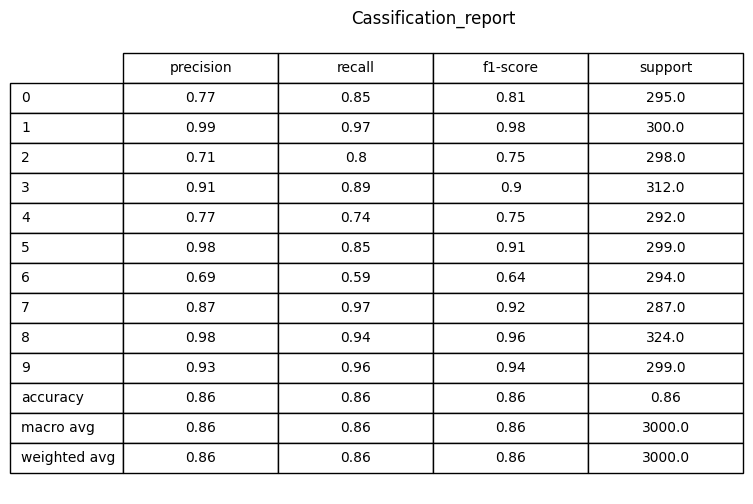

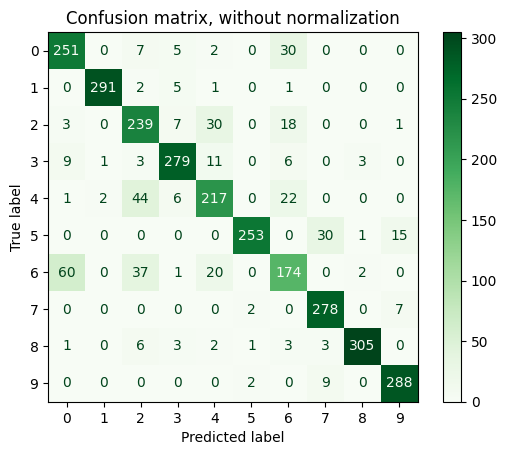

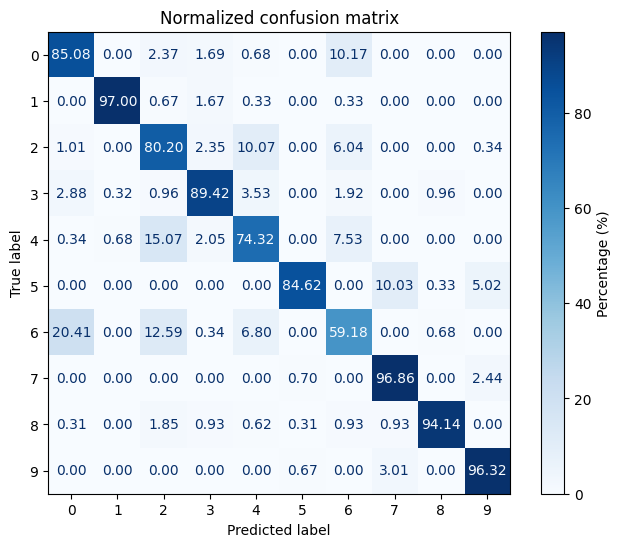

In [17]:
# TODO: Evaluate model 1 on the validation set
# calculate performance measures - F1, precision and recall
actual = y_validation
predicted = knn_best.predict(X_reduced_validation)
report = metrics.classification_report(actual, predicted, output_dict = True)
draw_table_classfication_report(report)
# confusion matrices
plot_confusion_matrices(knn_best,actual,predicted)

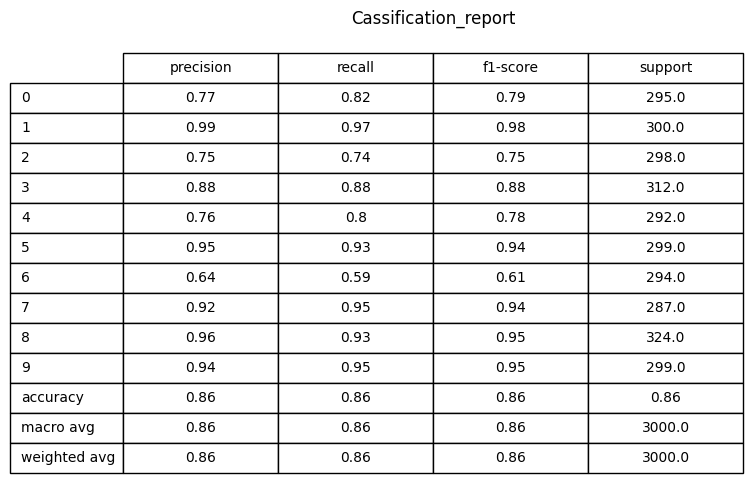

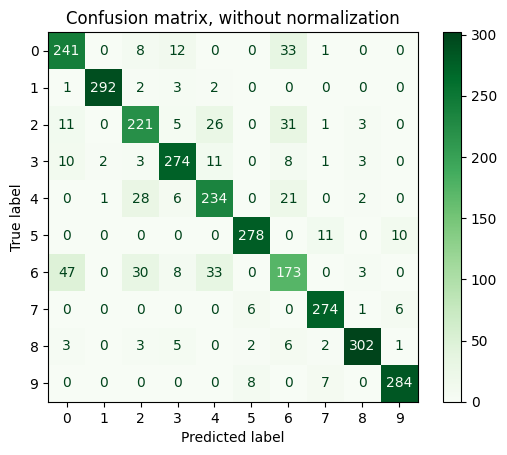

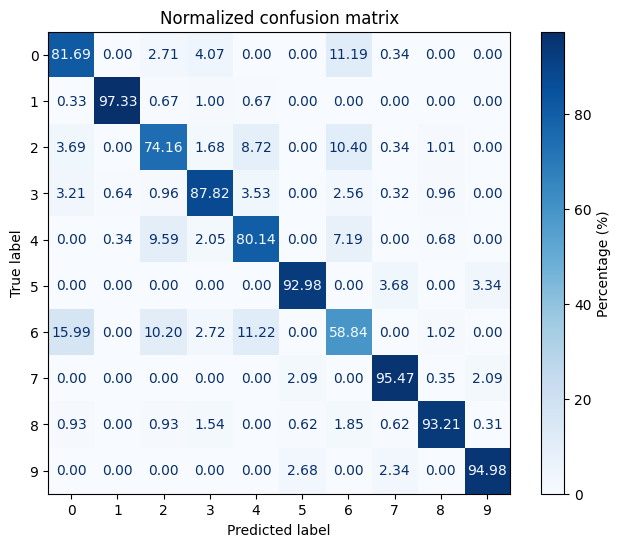

In [18]:
# TODO: Evaluate model 2 on the validation set
# calculate performance measures - F1, precision and recall
actual = y_validation
predicted = logistic_model_best.predict(X_reduced_validation)
report = metrics.classification_report(actual, predicted, output_dict = True)
draw_table_classfication_report(report)
# confusion matrices
plot_confusion_matrices(logistic_model_best,actual,predicted)

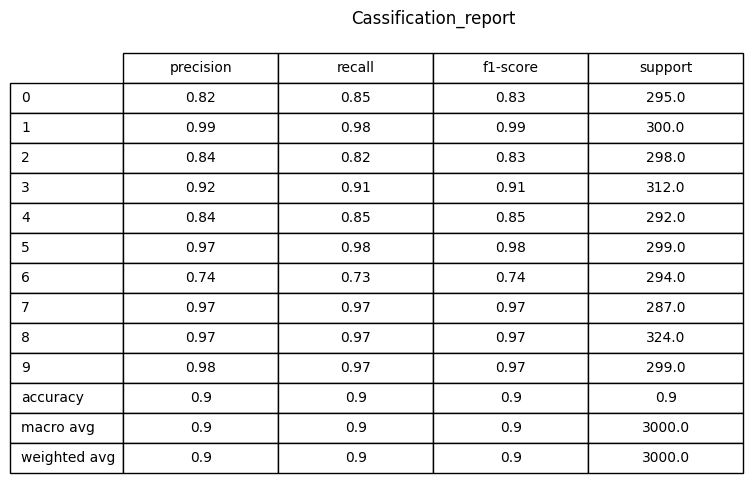

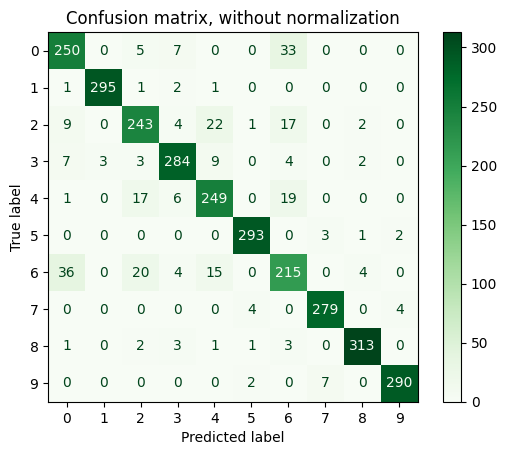

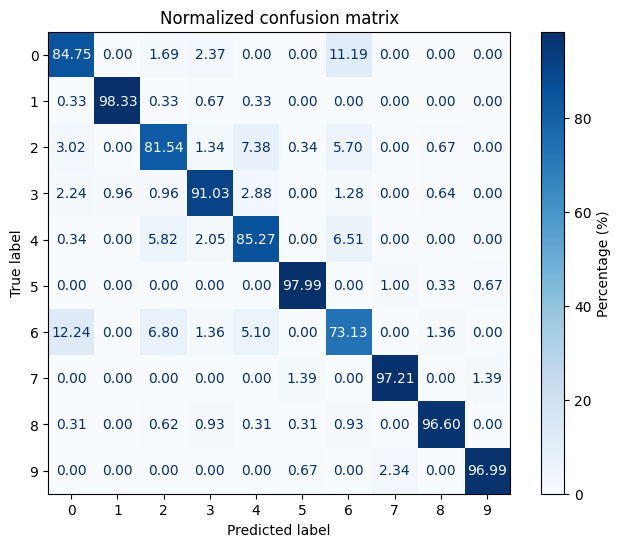

In [19]:
# TODO: Evaluate model 3 on the validation set
# calculate performance measures - F1, precision and recall
actual = y_validation
predicted = svm_model_best.predict(X_reduced_validation)
report = metrics.classification_report(actual, predicted, output_dict = True)
draw_table_classfication_report(report)
# confusion matrices
plot_confusion_matrices(svm_model_best,actual,predicted)

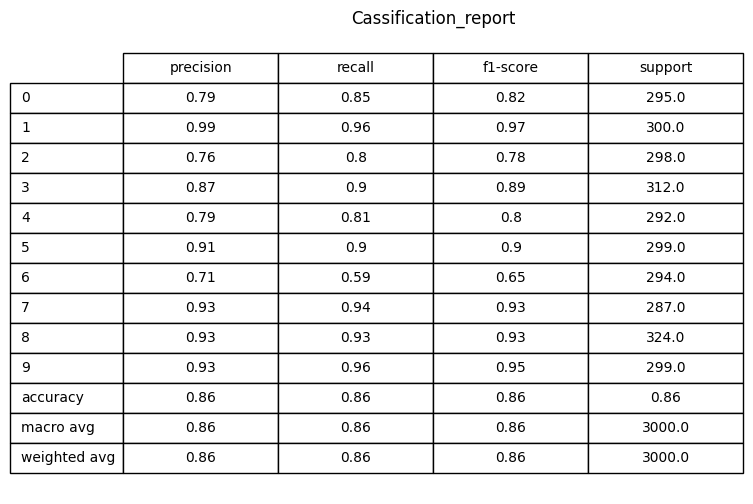

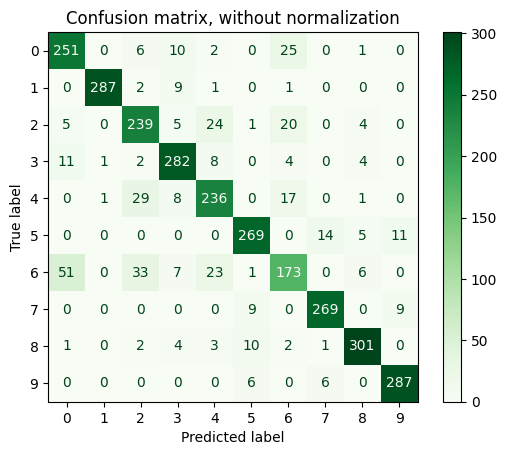

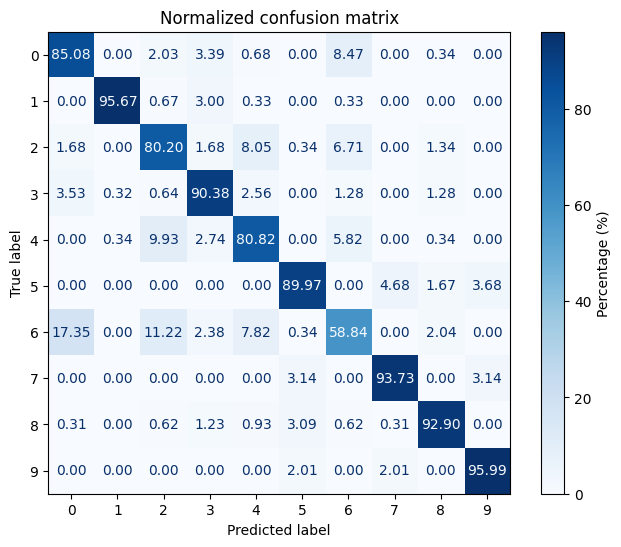

In [20]:
# TODO: Evaluate model 4 on the validation set
# calculate performance measures - F1, precision and recall
actual = y_validation
predicted = random_forest_best.predict(X_reduced_validation)
report = metrics.classification_report(actual, predicted, output_dict = True)
draw_table_classfication_report(report)
# confusion matrices
plot_confusion_matrices(random_forest_best,actual,predicted)

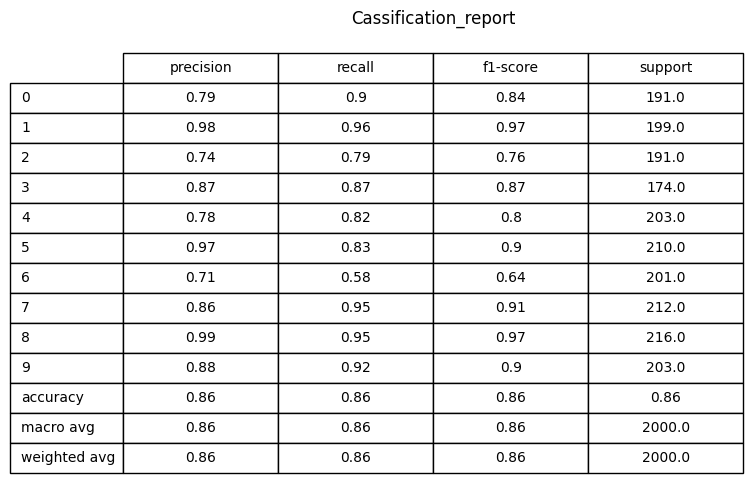

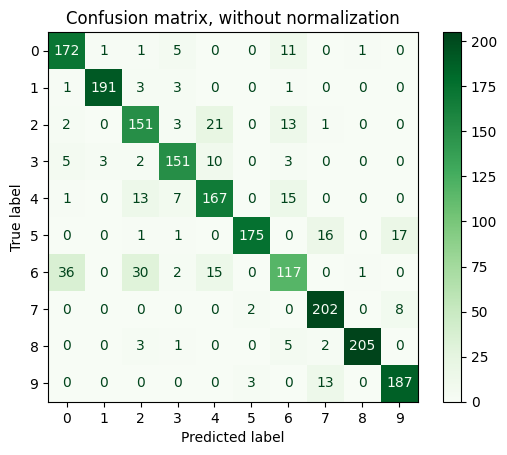

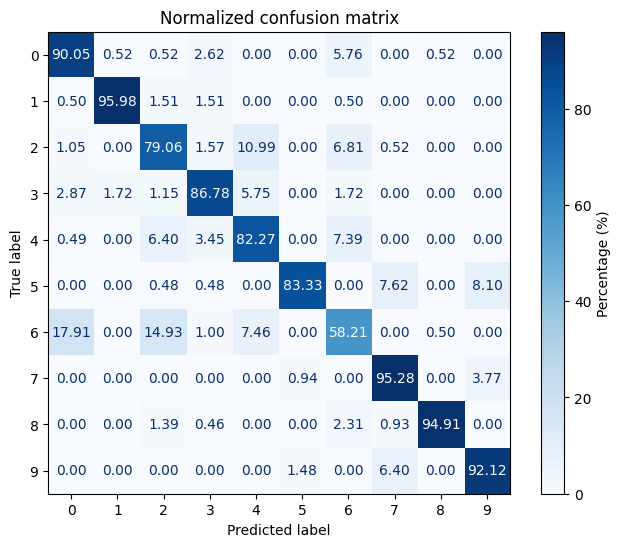

In [21]:
# TODO: Evaluate model 1 on the test set
# calculate performance measures - F1, precision and recall
actual = y_test
predicted = knn_best.predict(X_reduced_test)
report = metrics.classification_report(actual, predicted, output_dict = True)
draw_table_classfication_report(report)
# confusion matrices
plot_confusion_matrices(knn_best,actual,predicted)

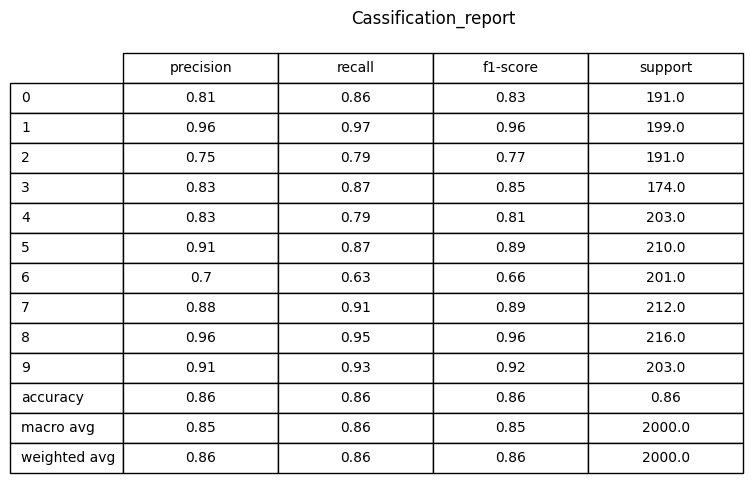

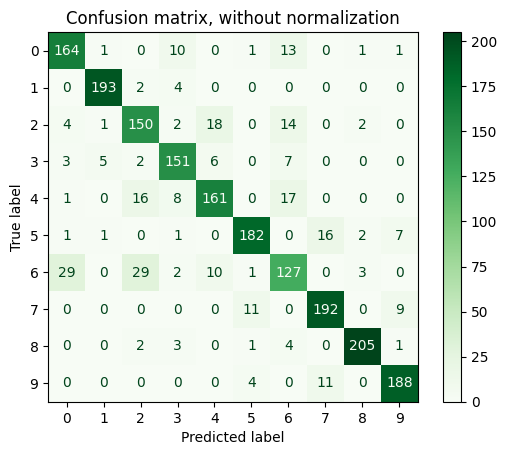

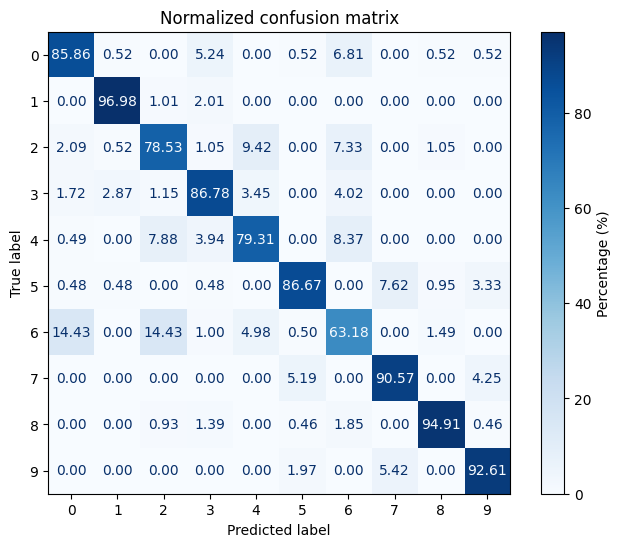

In [22]:
# TODO: Evaluate model 2 on the test set
# calculate performance measures - F1, precision and recall
actual = y_test
predicted = logistic_model_best.predict(X_reduced_test)
report = metrics.classification_report(actual, predicted, output_dict = True)
draw_table_classfication_report(report)
# confusion matrices
plot_confusion_matrices(logistic_model_best,actual,predicted)

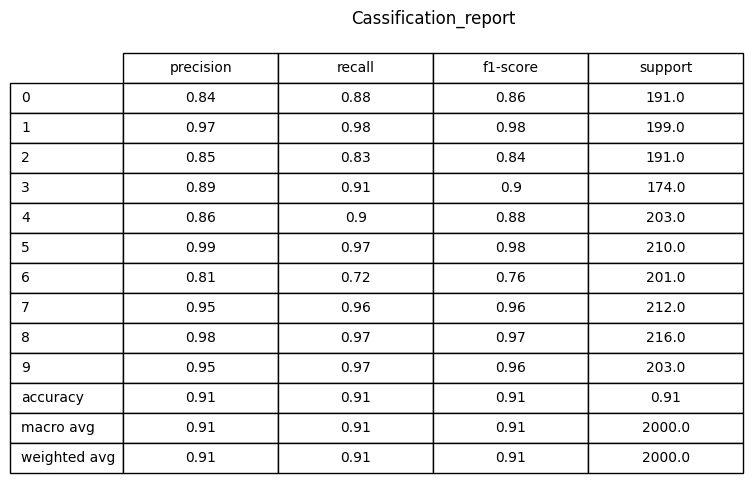

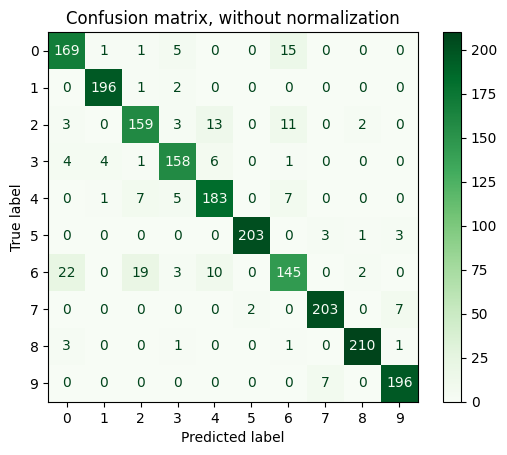

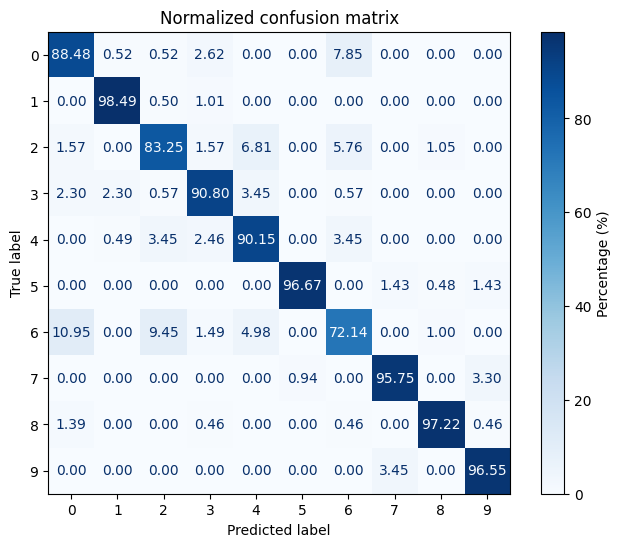

In [23]:
# TODO: Evaluate model 3 on the test set
# calculate performance measures - F1, precision and recall
actual = y_test
predicted = svm_model_best.predict(X_reduced_test)
report = metrics.classification_report(actual, predicted, output_dict = True)
draw_table_classfication_report(report)
# confusion matrices
plot_confusion_matrices(svm_model_best,actual,predicted)

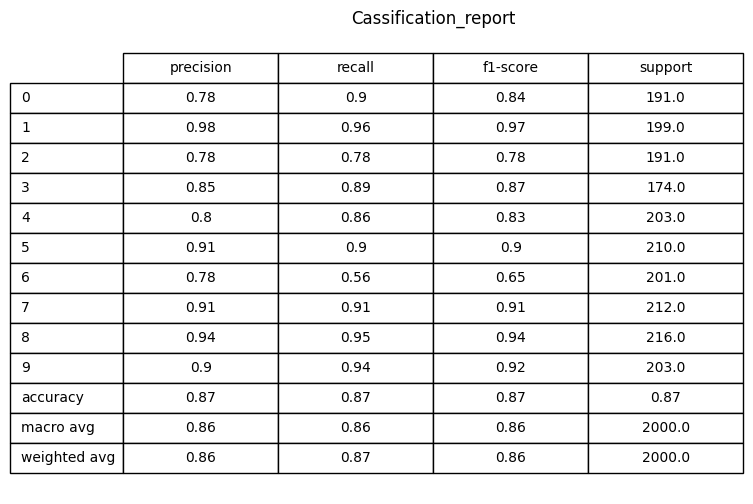

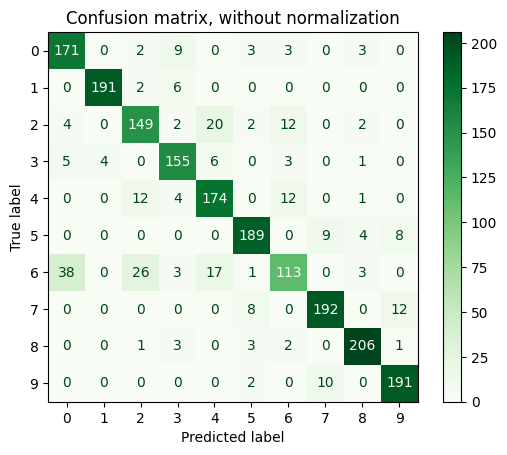

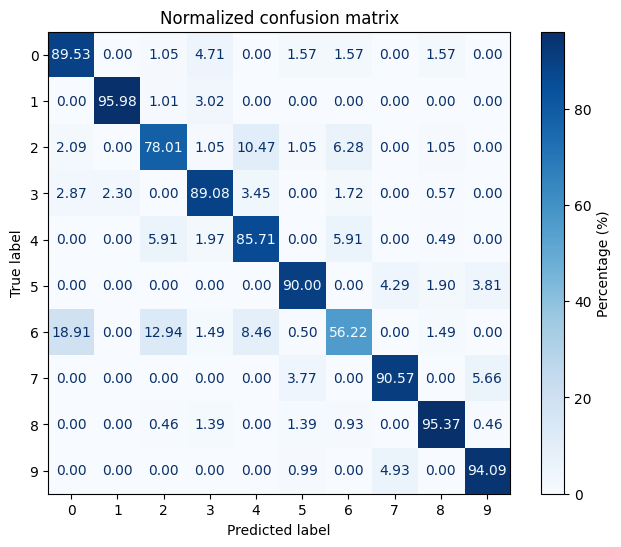

In [24]:
# TODO: Evaluate model 4 on the test set
# calculate performance measures - F1, precision and recall
actual = y_test
predicted = random_forest_best.predict(X_reduced_test)
report = metrics.classification_report(actual, predicted, output_dict = True)
draw_table_classfication_report(report)
# confusion matrices
plot_confusion_matrices(random_forest_best,actual,predicted)

### 4.1.8 Comparison

Compare all classifiers with their optimized hyper-parameters, focusing on criteria such as classification performance, training time, and inference time. Visualization of these comparisons is required; use high-quality plots, figures, or tables to facilitate a clear understanding of the differences and strengths of each model.

In [25]:
# TODO: Compare performance of all models

In [26]:
# TODO: Evaluate classification performance for model 1
actual = y_test
predicted = knn_best.predict(X_reduced_test)
# get AUC-ROC
y_test_bin = label_binarize(y_test, classes = [0, 1, 2]) 
auc_scores = []
for i in range(y_test_bin.shape[1]):
    y_prob = knn_best.predict_proba(X_reduced_test)[:, i]
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_prob)
    auc_score = roc_auc_score(y_test_bin[:, i], y_prob)
    auc_scores.append(auc_score)
    auc_roc_knn = sum(auc_scores) / len(auc_scores)
# get accuracy, precision, recall,f1
metrics.classification_report(y_test, predicted)
accuracy_knn = accuracy_score(actual, predicted)
precision_knn = precision_score(actual, predicted, average = 'weighted')
recall_knn = recall_score(actual, predicted, average = 'weighted')
f1_knn = f1_score(actual, predicted, average = 'weighted')

In [27]:
# TODO: Evaluate classification performance for model 2
actual = y_test
predicted = logistic_model_best.predict(X_reduced_test)
# get AUC-ROC
y_test_bin = label_binarize(y_test, classes = [0, 1, 2])
auc_scores = []
for i in range(y_test_bin.shape[1]):
    y_prob = logistic_model_best.predict_proba(X_reduced_test)[:, i]
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_prob)
    auc_score = roc_auc_score(y_test_bin[:, i], y_prob)
    auc_scores.append(auc_score)
    auc_roc_logistic = sum(auc_scores) / len(auc_scores)
# get accuracy, precision, recall,f1
metrics.classification_report(y_test, predicted)
accuracy_logistic = accuracy_score(actual, predicted)
precision_logistic = precision_score(actual, predicted, average = 'weighted')
recall_logistic = recall_score(actual, predicted, average = 'weighted')
f1_logistic = f1_score(actual, predicted, average = 'weighted')

In [28]:
# TODO: Evaluate classification performance for model 3
actual = y_test
predicted = svm_model_best.predict(X_reduced_test)
# get AUC-ROC
y_test_bin = label_binarize(y_test, classes = [0, 1, 2])
auc_scores = []
for i in range(y_test_bin.shape[1]):
    y_prob = svm_model_best.predict_proba(X_reduced_test)[:, i]
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_prob)
    auc_score = roc_auc_score(y_test_bin[:, i], y_prob)
    auc_scores.append(auc_score)
    auc_roc_svm = sum(auc_scores) / len(auc_scores)
# get accuracy, precision, recall,f1
metrics.classification_report(y_test, predicted)
accuracy_svm = accuracy_score(actual, predicted)
precision_svm = precision_score(actual, predicted, average = 'weighted')
recall_svm = recall_score(actual, predicted, average = 'weighted')
f1_svm = f1_score(actual, predicted, average = 'weighted')

In [29]:
# TODO: Evaluate classification performance for model 4
actual = y_test
predicted = random_forest_best.predict(X_reduced_test)
# get AUC-ROC
y_test_bin = label_binarize(y_test, classes = [0, 1, 2])
auc_scores = []
for i in range(y_test_bin.shape[1]):
    y_prob = random_forest_best.predict_proba(X_reduced_test)[:, i]
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_prob)
    auc_score = roc_auc_score(y_test_bin[:, i], y_prob)
    auc_scores.append(auc_score)
    auc_roc_rf = sum(auc_scores) / len(auc_scores)
# get accuracy, precision, recall,f1
metrics.classification_report(y_test, predicted)
accuracy_rf = accuracy_score(actual, predicted)
precision_rf = precision_score(actual, predicted, average = 'weighted')
recall_rf = recall_score(actual, predicted, average = 'weighted')
f1_rf = f1_score(actual, predicted, average = 'weighted')

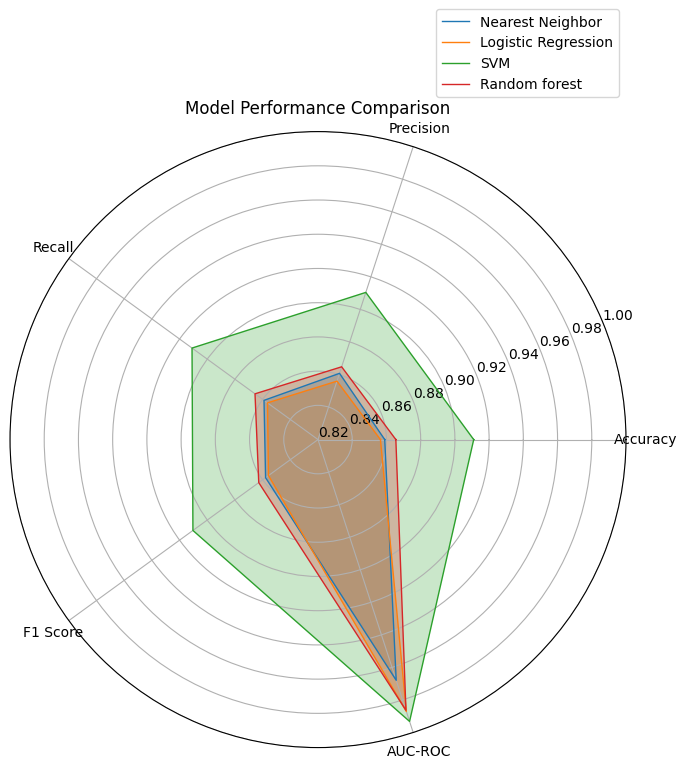

In [30]:
# Generate a radar chart evaluating classification performance of 
# different classifiers
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']
scores = [
    [accuracy_knn, precision_knn, recall_knn, f1_knn, auc_roc_knn],  
    [accuracy_logistic, precision_logistic, recall_logistic, f1_logistic, 
                                                        auc_roc_logistic], 
    [accuracy_svm, precision_svm, recall_svm, f1_svm, auc_roc_svm],  
    [accuracy_rf, precision_rf, recall_rf, f1_rf, auc_roc_rf]   
]
classifiers = ['Nearest Neighbor', 'Logistic Regression', 'SVM', 
                                                            'Random forest']
plot_radar_chart(labels, scores, classifiers, "Model Performance Comparison")

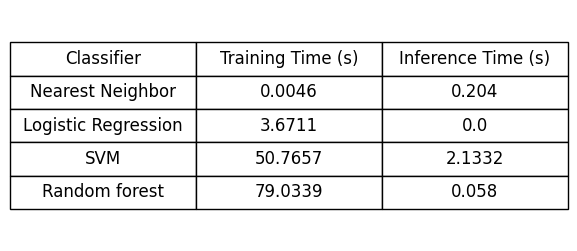

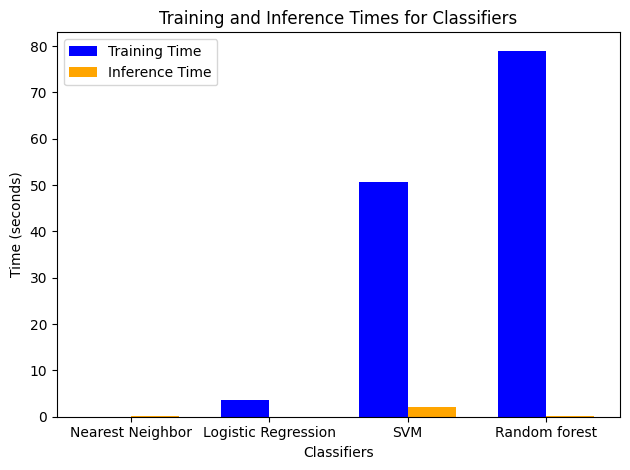

In [31]:
# Generate a table comparing the training and inference times of 
# different classifiers
data = {
    'Classifier': ['Nearest Neighbor', 'Logistic Regression', 'SVM', 
                                                        'Random forest'],
    'Training Time (s)': [training_time1, training_time2, training_time3, 
                                                            training_time4],
    'Inference Time (s)': [inference_time1, inference_time2, inference_time3, 
                                                            inference_time4]
}

df = pd.DataFrame(data)
df = df.round(4)
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', 
                                                            loc = 'center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2)
plt.show()

# Generate a bar chart comparing the training and inference times of 
# different classifiers
classifiers = ['Nearest Neighbor', 'Logistic Regression', 'SVM', 
                                                            'Random forest']
training_times = [training_time1, training_time2, training_time3, 
                                                    training_time4] 
inference_times = [inference_time1, inference_time2, inference_time3, 
                                                    inference_time4]  
bar_width = 0.35
index = np.arange(len(classifiers))
fig, ax = plt.subplots()
bar1 = ax.bar(index, training_times, bar_width, label = 'Training Time', 
                                                        color = 'blue')
bar2 = ax.bar(index + bar_width, inference_times, bar_width, 
                                label = 'Inference Time', color = 'orange')
ax.set_xlabel('Classifiers')
ax.set_ylabel('Time (seconds)')
ax.set_title('Training and Inference Times for Classifiers')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classifiers)
ax.legend()
plt.tight_layout()
plt.show()

### 4.1.9 The Best Classifier

Conclude the best classifier

In [32]:
# TODO: Train and test the classifier which has the best performance
svm_model_best.fit(X_reduced_train,y_train)
best_predict = svm_model_best.predict(X_reduced_test)
accuracy = accuracy_score(best_predict, y_test)
print(f"The accuracy of the best model is : {accuracy:.3f}")

The accuracy of the best model is : 0.911


### 4.1.10 Loading testing data

Load the testing data for prediction

In [33]:
# test2.csv includes 5000 samples used for label prediction. 
# Test samples do not have labels.
data_test_df = pd.read_csv('./data/test2.csv', index_col=0)

In [34]:
# print out the first 5 rows of the test dataframe
data_test_df.head()

,v1,v2,v3,v4,v5,...,v780,v781,v782,v783,v784
id,,,,,,,,,,,
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,0,0,...,0,0,0,0,0
3,0,0,0,0,0,...,0,0,0,0,0
4,0,0,1,0,2,...,0,0,0,0,0
5,0,0,0,0,0,...,0,0,0,0,0


Use the your best classifier to make predictions for the test data. The predictions should be stored in a vector named `output`, with a length of 5000.

In [35]:
# TODO: Use your best classifier to make predictions on unseen data. 
# The output of this code must be a vector named 'output' of length 5000
svm_model_best.fit(X_reduced_train,y_train)
x_test2 = data_test_df.to_numpy()
# Normalization
scaler = MinMaxScaler()#creating an object
scaler.fit(X_train)
X_test2_norm = scaler.transform(x_test2)
# Deal with the missing value
X_test2_norm = pd.DataFrame(X_test2_norm).fillna(X_test2_norm.mean())
X_test2_norm = X_test2_norm.to_numpy()
# Dimentions reduction
pca = PCA(n_components=0.95)
pca.fit(X_train_norm)
X_reduced_test2 = pca.transform(X_test2_norm)
output = svm_model_best.predict(X_reduced_test2)

Save your prediction vector as a `test_output.csv` file, which contains two columns: `id` and `label`. Please refer to the `example_output.csv` for the structure of this output file.

In [ ]:
output_df = pd.DataFrame(output, columns = ['label'])
output_df.to_csv('./test_output.csv', sep=",", float_format='%d',
                                                index_label="id")

## 4.2 Report

The report must be structured into the following key sections:

1. **Introduction**: Provide a comprehensive overview of the dataset, outline the methods chosen, and summarize the key findings and results.
2. **Methodology**: Describe pre-processing techniques and ML algorithms employed in this assignment. Include a discussion of the theoretical principles underlying each method and explain the rationale behind your choices.
3. **Result and Discussion**: Detail the experimental settings (e.g., implementation strategies, hyperparameter finetuning strategies, etc.). Present the results obtained from the selected algorithms and discuss their implications. Compare the performance of all models, considering factors such as accuracy, model complexity, training time, and inference time. Employ high-quality plots, figures, and tables to visually support and enhance the discussion of these results.
4. **Conclusion**: Summarize your main findings, mention any limitations methods and results and suggest potential directions for future works.
5. **References**: include the references cited in your report in a consistent format.

##### Important Notes

- The maximum length of the main report is 8 pages (excluding appendix and references).

-  You must include an appendix that clearly provides the instructions on how to setup the environment to run your code, especialy the installation guide and version of any external packages and
libraries used for implementation. In addition, you should include the hardware configurations used for the coding environment.

- The report must be in PDF format. Make sure the report is well-structured, easy to read, and that it presents your findings in a logical and organized way.


# 5. Submission Guidelines

## 5.1 Group Registration

For this assignment, you can work in groups of TWO. Please register your group under *People → Group → A1.1-Group* or *People → Group → A1.2-Group* on Canvas (We have created two separate group sets to accommodate the large number of students enrolled in this course).  

**The group registration should be done by Friday, Aug 30th, 2024.**

## 5.2 Submit your work

### 5.2.1 Submit to Kaggle

We use the Kaggle leaderboard for evaluating the results predicted by your models on unseen data. Follow the steps below to submit your work to the Kaggle leaderboard.

Kaggle link: [https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/](https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/)

1. Use the [Kaggle link](https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/) to join the competition, you need to create a Kaggle account if you don’t
have one.

2. Go to Team $\rightarrow$ Use your registered Group ID on Canvas as your team name (e.g., `A1.1-Group 1`). You can create a Kaggle team with up to 2 members.
   
3. Go to Description $\rightarrow$ Check the IMPORTANT NOTES for the assignment.
   
4. Submit Predictions $\rightarrow$ Follow the submission format and submit your prediction output file (`test_output.csv`).
   
5. Leaderboard $\rightarrow$ Check your accuracy score at the Leaderboard.

In summary, go to [Kaggle Page](https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/) $\rightarrow$ Join Competition $\rightarrow$ Create a Team $\rightarrow$ Submit Predictions $\rightarrow$ Submit file `test_output.csv`

IMPORTANT: This link is only available to the students of COMP4318/5318. All groups need to submit `test_output.csv` to Kaggle for marking puporse. Only 5 submissions are allowed per day
for Kaggle. Group ID on Canvas and Kaggle have to be identical otherwise the submission will not be marked for the Accuracy part.



### 5.2.2 Submit to Canvas

#### Proceed to the submission box on Canvas and submit 4 files separately as follows:

   1. A `.pdf` report file.

   2. An `.ipynb` code file: a Jupyter Notebook containing all your implementation. You can reuse the provided `.ipynb` template.
    
   3. A `.pdf` code file: this file is exported from the `.ipynb` file for checking plagiarism.

   4. A `test_output.csv` file: contains the predictions made by your best classifier on unseen data. This file must be consistent with the one submitted on Kaggle.

There are two different submission boxes for the different group sets: *Assignment 1 - Submission (for A1.1-Group)* and *Assignment 1 - Submission (for A1.2-Group)*. Please ensure you submit to the correct box corresponding to your group ID.

##### File Naming Conventions

The submission files should be named with your group ID and all student ID (SID) separated by the underscore (_). For example,

- a1_groupID_SID1_SID2.ipynb (code)
  
- a1_groupID_SID1_SID2.pdf (pdf version of the code)
  
- a1_groupID_SID1_SID2_report.pdf (report)
  
where SID1 and SID2 are the SIDs of the two students.


##### Important Notes:
-	Only one group member needs to submit the assignment on behalf of the group.

-	Do NOT submit the dataset or zip files to Canvas. We will copy the `data` folder to the same directory with your `.ipynb` file to run your code. Please make sure your code is able to read the dataset from this folder.

-	Both the code and report will be checked for plagiarism.

##### Other guidelines

1.	Please refer to lecture notes, lab materials, and other course resources for different ML methods.

2.	Please proceed your own way if we do not specify it in the assignment details.

3.	You can use any packages or code which have been introduced in lectures or tutorials. If you use any other packages or code snippets, please put the reference at the bottom of the code. Otherwise, it will be considered as plagiarism and the relevant section will not be marked.


## 5.3 Late Submission Penalties

##### A penalty of MINUS 5 percent (-5%) for each day after the due date.
The maximum delay for assignment submission is 5 (five) days, after which assignment will not be accepted.

**You should upload your assignment at least half a day or one day prior to the submission deadline to avoid network congestion**.

Canvas and Kaggle may not be able to handle a large number of submission happening at the same time. If you submit your assignment at a time close to the deadline, a submission error may occur causing your submission to be considered late. Penalty will be applied to late submission regardless of issues.

##### All files required for assignment 1 can be downloaded from Canvas $\rightarrow$ Assignments $\rightarrow$ Assignment 1 - Specification


## 5.4 Marking Rubric

Please refer to the rubric, which is available in the submission boxes on Canvas, for detailed marking scheme.

# 6. Inquiries after releasing the marking

**After Assignment 1 marks come out, please submit your inquiries about marking within the 1st week. All inquiries after that will be ignored.**

# 7. Academic honesty

Please read the University policy on Academic Honesty very carefully:
https://sydney.edu.au/students/academic-integrity.html

Plagiarism (copying from another student, website or other sources), making your work available to another student to copy, engaging another person to complete the assignments instead of you (for payment or not) are all examples of academic dishonesty. Note that when there is copying between students, both students are penalised – the student who copies and the student who makes his/her work available for copying. The University penalties are severe and include:

    * a permanent record of academic dishonesty on your student file,
    * mark deduction, ranging from 0 for the assignment to Fail for the course
    * expulsion from the University and cancelling of your student visa.

In addition, the Australian Government passed a new legislation last year (Prohibiting Academic Cheating Services Bill) that makes it a criminal offence to provide or advertise academic cheating services - the provision or undertaking of work for students which forms a substantial part of a student’s assessment task. Do not confuse legitimate co-operation and cheating!